# EcoFOCIpy ADCP QC - 20BSP-14A

- mostly remove >100 cm/s flows in u/v


In [20]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [21]:
file_in = '20bsp14a_0031m.nc'
xdf = xa.load_dataset(file_in)

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

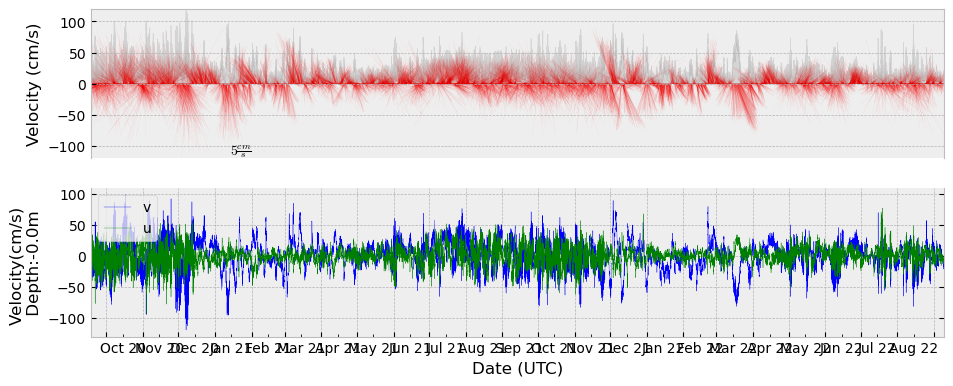

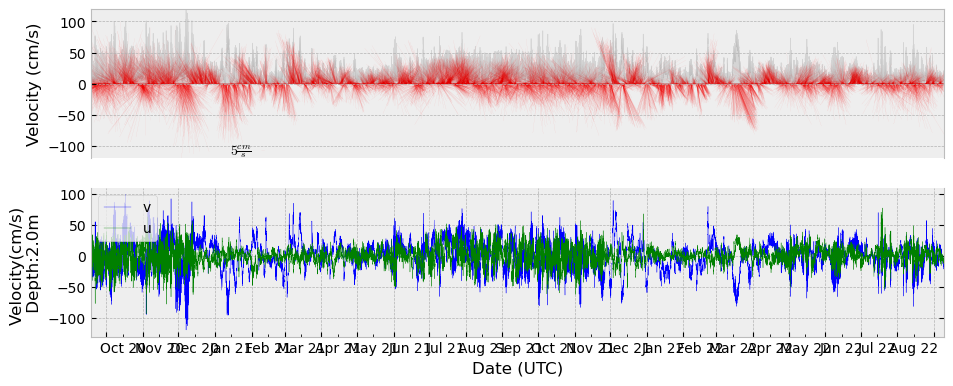

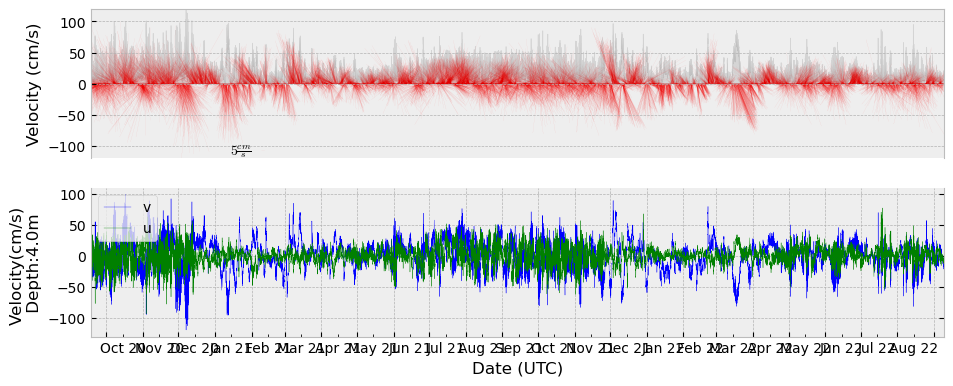

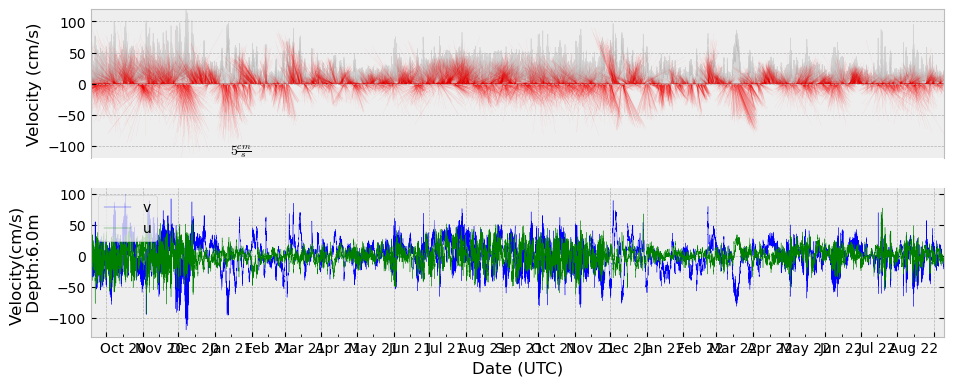

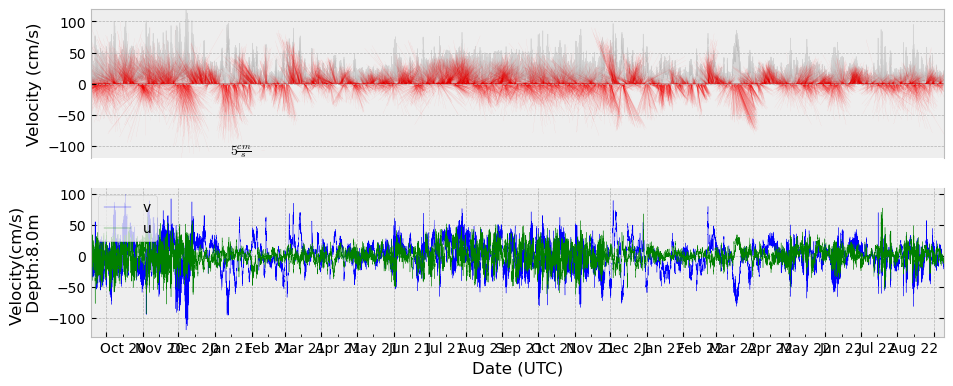

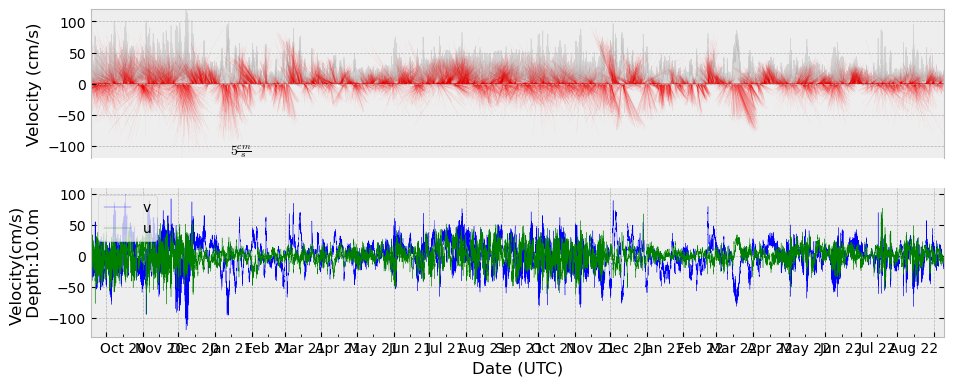

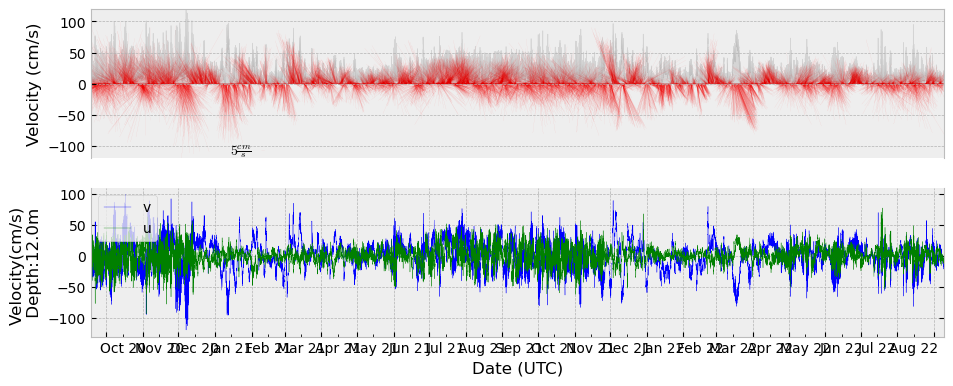

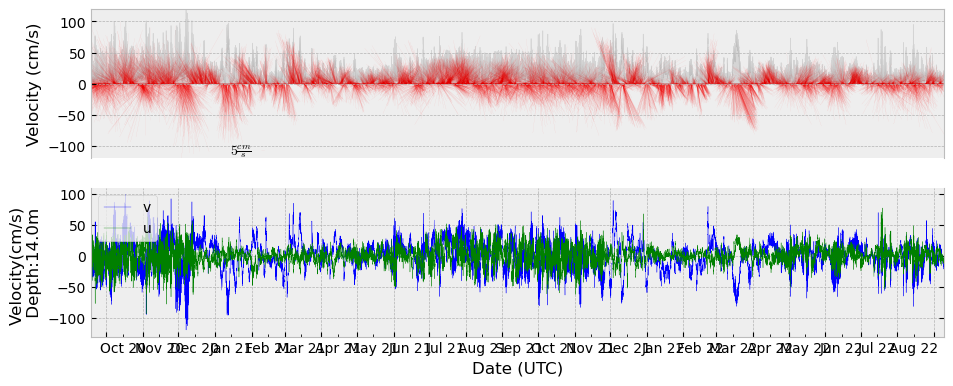

In [38]:
for i in range(0,len(xdf),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=1,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=1,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [39]:
xdf =xdf.where(xdf.u_curr_comp <=1000,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 34591, depth: 15)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-18T08:00:00 ... 2022-09-08...
  * depth            (depth) float64 -0.0 2.0 4.0 6.0 ... 22.0 24.0 26.0 28.0
  * latitude         (latitude) float64 64.0
  * longitude        (longitude) float64 -167.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 55.77 ... 0.3259
    v_curr_comp      (latitude, longitude, time, depth) float64 -127.8 ... 15.09
    w_curr_comp      (latitude, longitude, time, depth) float64 6.8 7.4 ... -0.1
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -2.7 ... 0.4
    agc1             (latitude, longitude, time, depth) float64 198.0 ... 80.0
    agc2             (latitude, longitude, time, depth) float64 204.0 ... 76.0
    agc3             (latitude, longitude, time, depth) float64 206.0 ... 86.0
    agc4             (latitude, longitude, time, depth) float64 203.0 ... 69.0
Attributes: (12/13)
    Latitude_DegMMddW:                      64 00.156 N
    Longitude_DegMMddN:                     167 56.043 W
    MooringID:                              20BSP-14A
    platform_deployment_date:               2020-09-18T07:37:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2022-09-08T23:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             38.1
    date_created:                           2024-04-02T15:51:28Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.  removed U...

In [40]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

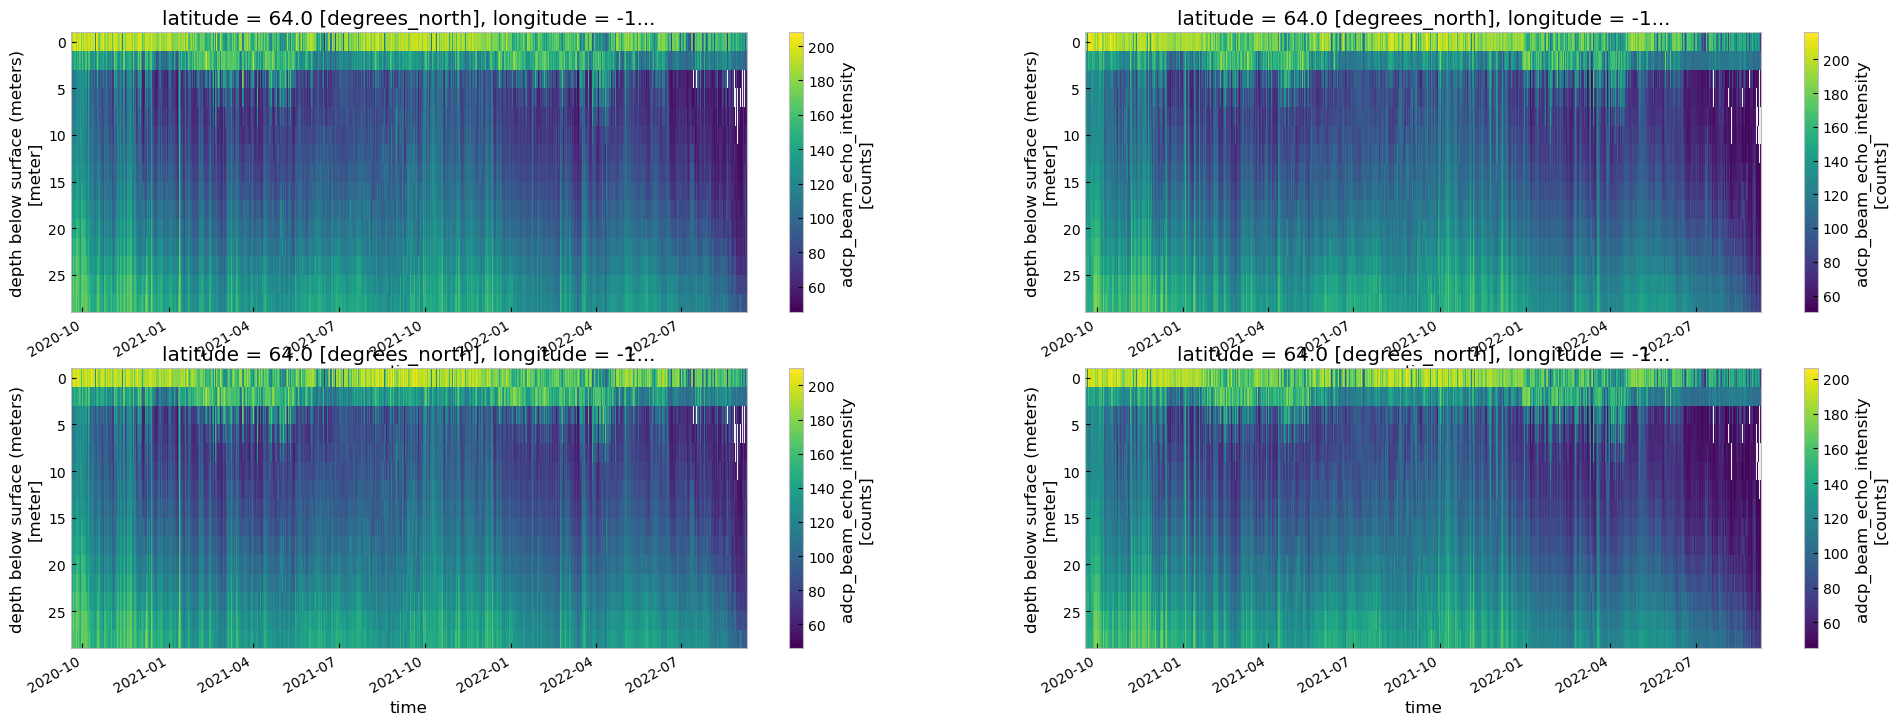

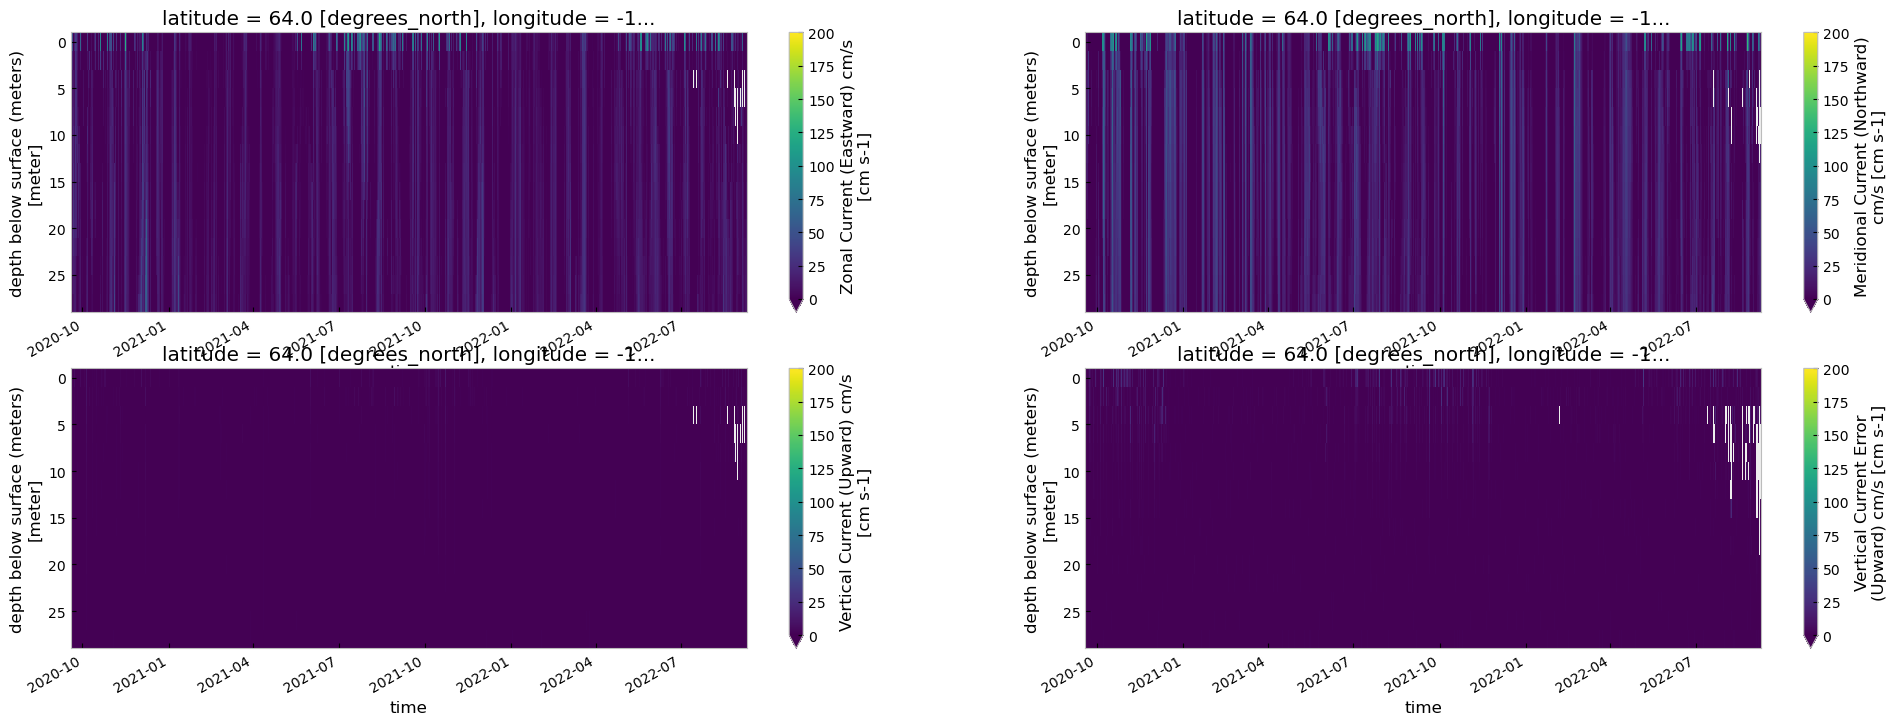

In [41]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [42]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >1000cm/s'

## Trim above surface (negative values)

In [43]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [44]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [45]:
ixdf.to_netcdf(file_in.replace('.nc','.trimmed.nc'))

In [46]:
xdf = xa.load_dataset(file_in.replace('.nc','.trimmed.nc'))

In [47]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [48]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [49]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [50]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

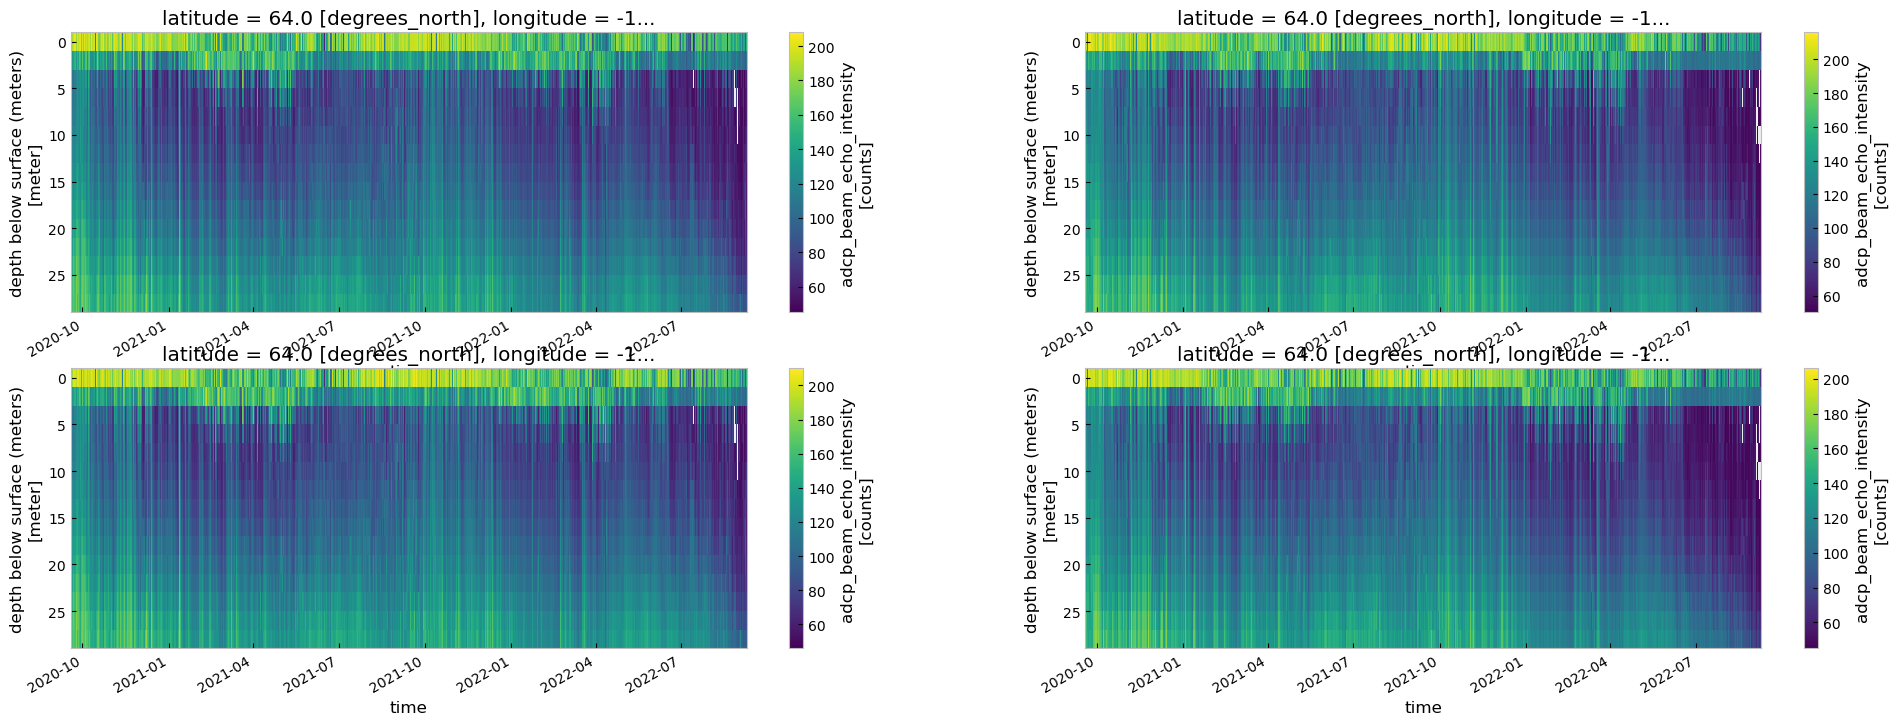

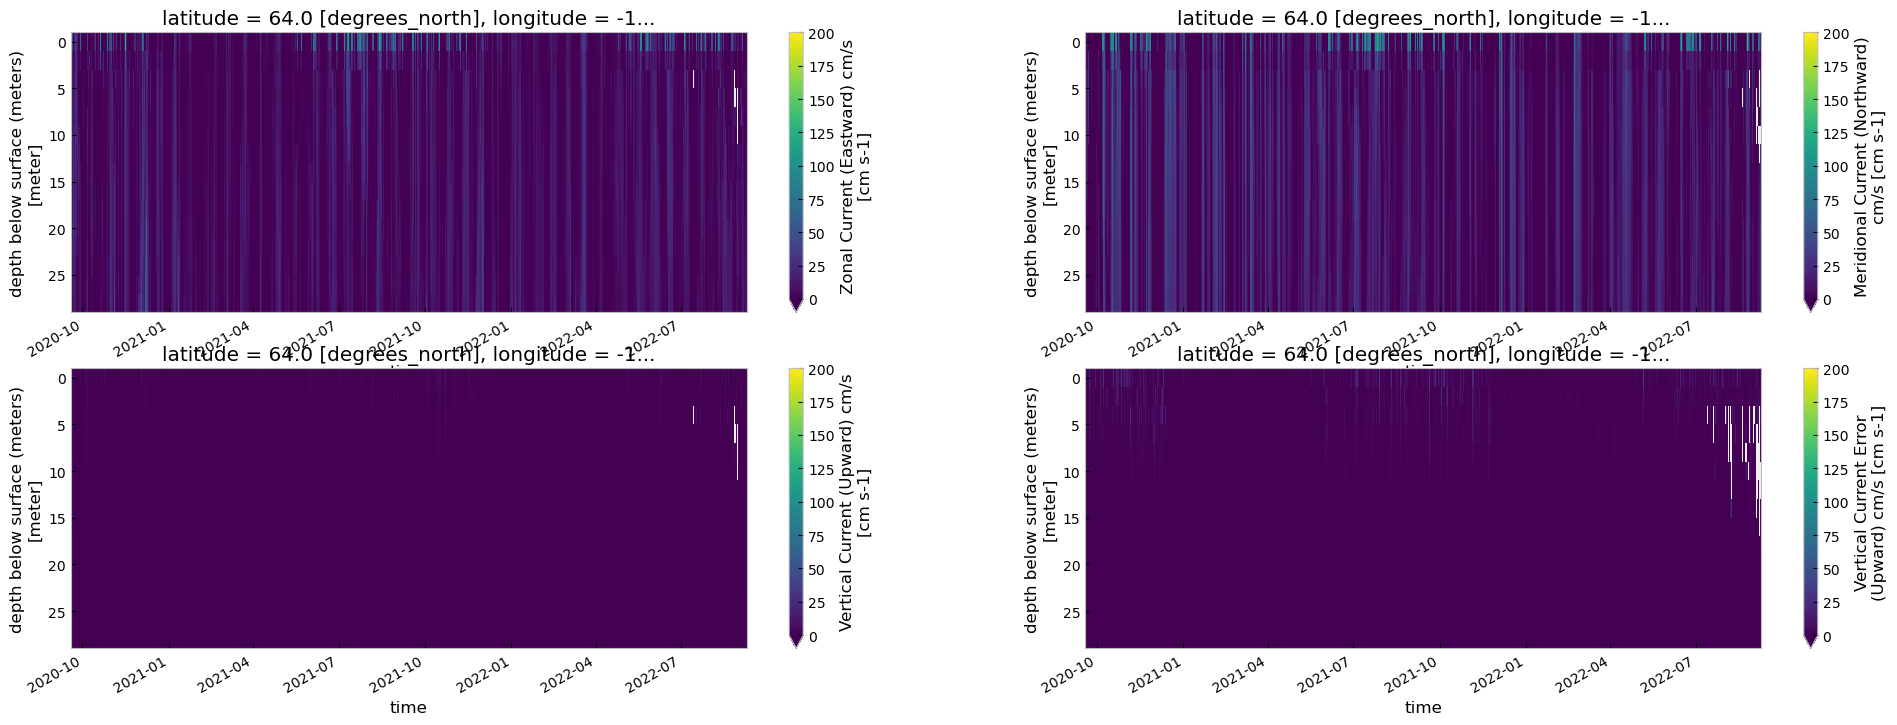

In [51]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [36]:
ixdf.to_netcdf(file_in.replace('.nc','.filtered.nc'))